<Figure size 432x288 with 0 Axes>

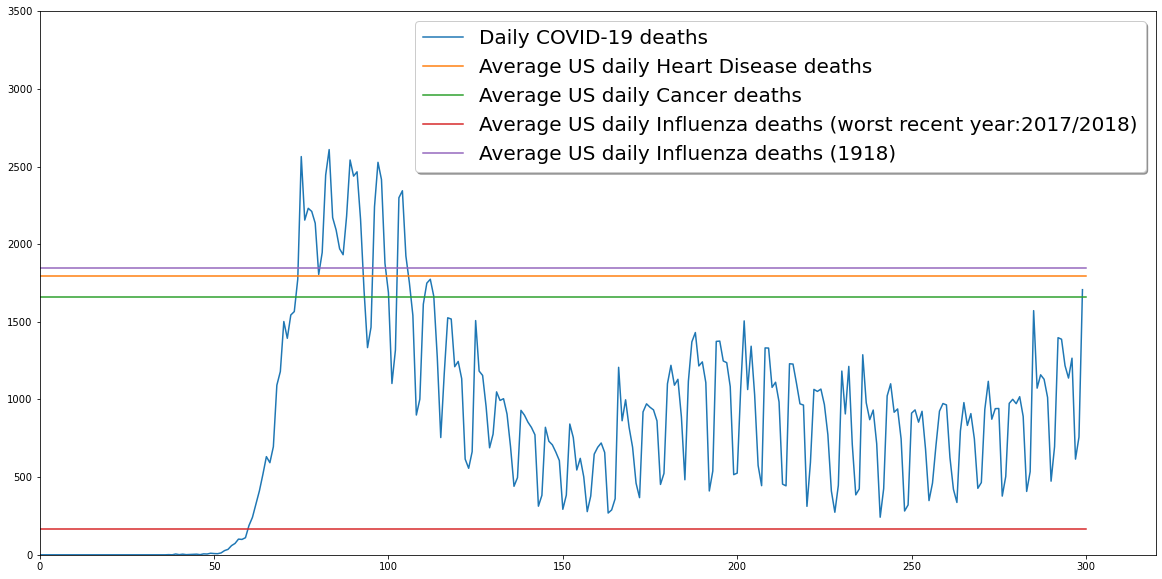

In [30]:
from numpy import log10, asarray, polyfit, ceil, arange, diff
import csv
import matplotlib.pyplot as plt
from numpy import log10, asarray, polyfit, ceil, arange
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import json
import os.path
from os import path
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def read_covid_data(data_type):
    if (data_type in ['confirmed', 'deaths', 'recovered']):
        COVID_directory = "/Users/kootsoop/git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
        first_row = None
        with open(COVID_directory + 'time_series_covid19_' + data_type + '_global.csv') as csvfile:
            confirmed = csv.reader(csvfile)
            for row in confirmed:
                if (first_row == None):
                    first_row = row
                if (row[1] == 'US'):
                    us_data = row
                    break
    else:
        raise Exception('Invalid data_type', data_type)
    return(first_row, us_data)

(first_row, confirmed) = read_covid_data('confirmed')
(first_row2, recovered) = read_covid_data('recovered')
(first_row3, deaths) = read_covid_data('deaths')

death_data = [(float(data)) for data in deaths[4:(len(first_row))]]
recovered_data = [(float(data)) for data in recovered[4:(len(first_row))]]
confirmed_data = [(float(data)) for data in confirmed[4:(len(first_row))]]
first_row_shifted = [ data for data in first_row[4:(len(first_row))]]

#plt.figure(0)
#plt.figure(figsize=(20,20))
#plt.plot(first_row_shifted, death_data)


plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(diff(death_data), label='Daily COVID-19 deaths')
# https://www.cdc.gov/heartdisease/facts.htm
plt.plot([0, len(diff(death_data))],[655000.0/365.0,655000.0/365.0], label='Average US daily Heart Disease deaths')
# https://cancerstatisticscenter.cancer.org/#!/
plt.plot([0, len(diff(death_data))],[606520.0/365.0,606520.0/365.0], label='Average US daily Cancer deaths')
# https://www.cdc.gov/flu/about/burden/past-seasons.html
plt.plot([0, len(diff(death_data))],[61000/365.0,61000/365.0], label='Average US daily Influenza deaths (worst recent year:2017/2018)')
# https://www.cdc.gov/flu/pandemic-resources/1918-commemoration/1918-pandemic-history.htm#:~:text=The%20number%20of%20deaths%20was,and%2065%20years%20and%20older.
plt.plot([0, len(diff(death_data))],[675000/365.0,675000/365.0], label='Average US daily Influenza deaths (1918)')
plt.ylim(0,3500)
plt.xlim(0,320)

ax = plt.gca()
ax.legend(loc='upper right', shadow=True, fontsize=20)